# Unsupervised Learning: Trade&Ahead

**Marks: 60**

## Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


## Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

# clean up warnings
import warnings

warnings.filterwarnings("ignore")
%load_ext nb_black

<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [2]:
# upload the data and make a copy to work with
df = pd.read_csv("stock_data.csv")
stk_data = df.copy()

<IPython.core.display.Javascript object>

In [3]:
stk_data.shape

(340, 15)

<IPython.core.display.Javascript object>

In [4]:
stk_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

<IPython.core.display.Javascript object>

In [5]:
stk_data.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


<IPython.core.display.Javascript object>

In [6]:
stk_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Current Price,340.0,8.086234e+01,9.805509e+01,4.500000e+00,3.855500e+01,5.970500e+01,9.288000e+01,1.274950e+03
Price Change,340.0,4.078194e+00,1.200634e+01,-4.712969e+01,-9.394838e-01,4.819505e+00,1.069549e+01,5.505168e+01
Volatility,340.0,1.525976e+00,5.917984e-01,7.331632e-01,1.134878e+00,1.385593e+00,1.695549e+00,4.580042e+00
ROE,340.0,3.959706e+01,9.654754e+01,1.000000e+00,9.750000e+00,1.500000e+01,2.700000e+01,9.170000e+02
Cash Ratio,340.0,7.002353e+01,9.042133e+01,0.000000e+00,1.800000e+01,4.700000e+01,9.900000e+01,9.580000e+02
Net Cash Flow,340.0,5.553762e+07,1.946365e+09,-1.120800e+10,-1.939065e+08,2.098000e+06,1.698108e+08,2.076400e+10
Net Income,340.0,1.494385e+09,3.940150e+09,-2.352800e+10,3.523012e+08,7.073360e+08,1.899000e+09,2.444200e+10
Earnings Per Share,340.0,2.776662e+00,6.587779e+00,-6.120000e+01,1.557500e+00,2.895000e+00,4.620000e+00,5.009000e+01
Estimated Shares Outstanding,340.0,5.770283e+08,8.458496e+08,2.767216e+07,1.588482e+08,3.096751e+08,5.731175e+08,6.159292e+09
P/E Ratio,340.0,3.261256e+01,4.434873e+01,2.935451e+00,1.504465e+01,2.081988e+01,3.176476e+01,5.280391e+02


<IPython.core.display.Javascript object>

In [7]:
stk_data.isnull().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

<IPython.core.display.Javascript object>

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

<AxesSubplot:xlabel='Current Price', ylabel='Count'>

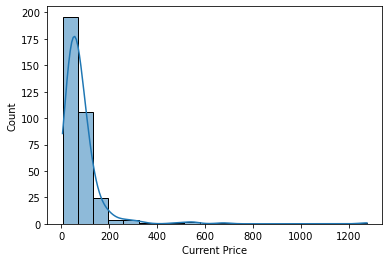

<IPython.core.display.Javascript object>

In [11]:
# 1 What does the distribution of stock prices look like? 
# Using Seaborne to make a histplot of the current price column of the data, setting the kde to True and adding 20 bins for readability.
sns.histplot(stk_data["Current Price"], kde=True, bins=20)

In [77]:
# 2 The stocks of which economic sector have seen the maximum price increase on average?
# get the total amount of price change per sector and place into new DF grouped by sectors.
stk_group = stk_data.groupby("GICS Sector").sum("Price Change")

# adding a new column to hold the counts of each sector
stk_group["counts"] = stk_data.value_counts("GICS Sector")

# divide the price change by counts to get the average price change for each sector.
stk_group["AVG_PRICE_CHANGE"] = stk_group["Price Change"] / stk_group["counts"]

# place the two Columns I want in new DataFrame
stk_df = pd.DataFrame(
    {"SECTOR": list(stk_group.index), "CHANGE": list(stk_group["AVG_PRICE_CHANGE"])}
)
stk_df

,SECTOR,CHANGE
0,Consumer Discretionary,5.846093
1,Consumer Staples,8.684750
2,Energy,-10.228289
3,Financials,3.865406
4,Health Care,9.585652
5,Industrials,2.833127
6,Information Technology,7.217476
7,Materials,5.589738
8,Real Estate,6.205548
9,Telecommunications Services,6.956980


<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Average Change in Share Price in Dollars')

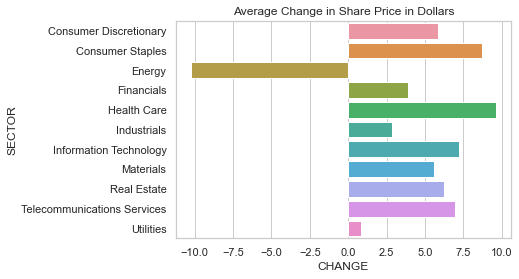

<IPython.core.display.Javascript object>

In [87]:
# Build a data visualization
sns.set_theme(style="whitegrid")
sns.barplot(y="SECTOR", x="CHANGE", data=stk_df)
plt.title("Average Change in Share Price in Dollars")

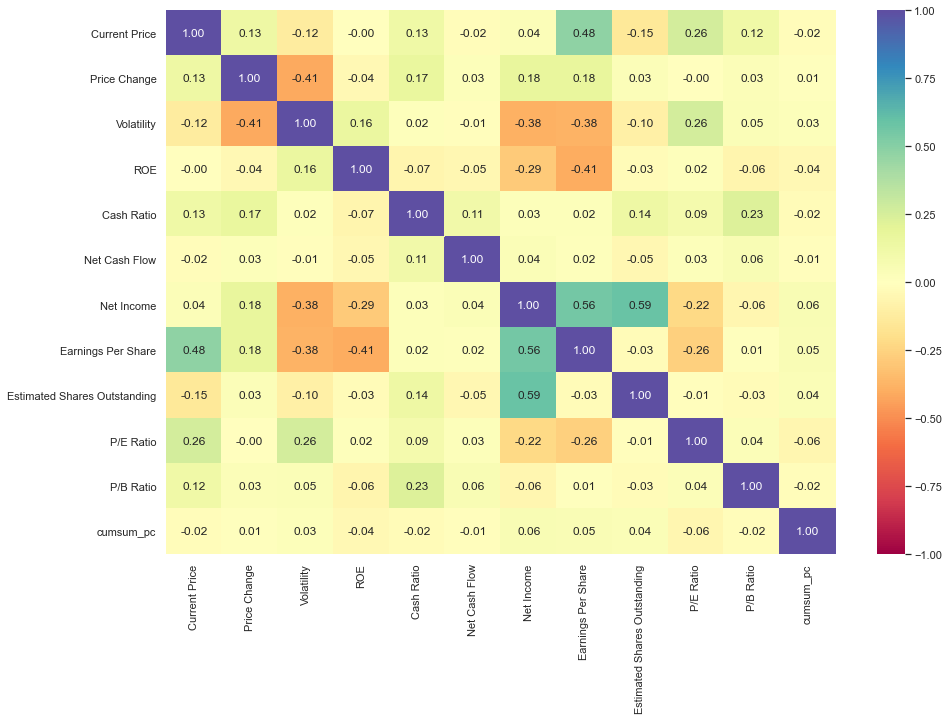

<IPython.core.display.Javascript object>

In [90]:
# How are the different variables correlated with each other?
# putting the numeric columns together 
cols_list = stk_data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 10))
sns.heatmap(
    stk_data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

In [92]:
#4 How does the average cash ratio vary across economic sectors?
# get the total amount of price change per sector and place into new DF grouped by sectors.
stk_ratio = stk_data.groupby("GICS Sector").sum("Cash Ratio")

# adding a new column to hold the counts of each sector
stk_ratio["counts"] = stk_data.value_counts("GICS Sector")

# divide the price change by counts to get the average price change for each sector.
stk_ratio["AVG_CASH"] = stk_ratio["Cash Ratio"] / stk_group["counts"]

# place the two Columns I want in new DataFrame
ratio_df = pd.DataFrame(
    {"SECTOR": list(stk_ratio.index), "CASH": list(stk_ratio["AVG_CASH"])}
)
ratio_df


,SECTOR,CASH
0,Consumer Discretionary,49.575000
1,Consumer Staples,70.947368
2,Energy,51.133333
3,Financials,98.591837
4,Health Care,103.775000
5,Industrials,36.188679
6,Information Technology,149.818182
7,Materials,41.700000
8,Real Estate,50.111111
9,Telecommunications Services,117.000000


<IPython.core.display.Javascript object>

Text(0.5, 0, 'Average Cash Ratio')

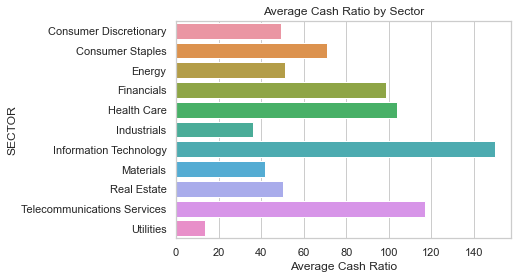

<IPython.core.display.Javascript object>

In [97]:
# Build a data visualization
sns.set_theme(style="whitegrid")
sns.barplot(y="SECTOR", x="CASH", data=ratio_df)
plt.title("Average Cash Ratio by Sector")
plt.xlabel("Average Cash Ratio")

In [100]:
# 5 How does the P/E ratio vary, on average, across economic sectors?

# 4 How does the average cash ratio vary across economic sectors?
# get the total amount of pe ratio per sector and place into new DF grouped by sectors.
stk_pe = stk_data.groupby("GICS Sector").sum("P/E Ratio")

# adding a new column to hold the counts of each sector
stk_pe["counts"] = stk_data.value_counts("GICS Sector")

# divide the pe ratio by counts to get the average change for each sector.
stk_pe["AVG_PE_RATIO"] = stk_pe["P/E Ratio"] / stk_group["counts"]

# place the two Columns I want in new DataFrame
pe_df = pd.DataFrame(
    {"SECTOR": list(stk_pe.index), "PE RATIO": list(stk_pe["AVG_PE_RATIO"])}
)
pe_df

,SECTOR,PE RATIO
0,Consumer Discretionary,35.211613
1,Consumer Staples,25.521195
2,Energy,72.897709
3,Financials,16.023151
4,Health Care,41.135272
5,Industrials,18.259380
6,Information Technology,43.782546
7,Materials,24.585352
8,Real Estate,43.065585
9,Telecommunications Services,12.222578


<IPython.core.display.Javascript object>

Text(0.5, 0, 'Average PE Ratio')

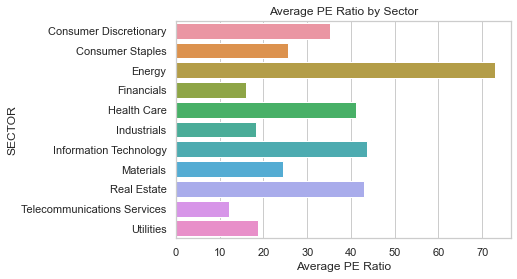

<IPython.core.display.Javascript object>

In [102]:
# Build a data visualization
sns.set_theme(style="whitegrid")
sns.barplot(y="SECTOR", x="PE RATIO", data=pe_df)
plt.title("Average PE Ratio by Sector")
plt.xlabel("Average PE Ratio")

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

## EDA

- It is a good idea to explore the data once again after manipulating it.

## K-means Clustering

## Hierarchical Clustering

## K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution?
- Which clustering technique gave you more distinct clusters, or are they the same?
- How many observations are there in the similar clusters of both algorithms?
- How many clusters are obtained as the appropriate number of clusters from both algorithms?

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.

## Actionable Insights and Recommendations

- 